# DATA MINING PROJECT

## PHASE-1 PRE-PROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import string
import re
from spellchecker import SpellChecker
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk import pos_tag
from nltk.corpus import words
import contractions
import pkg_resources
from symspellpy import SymSpell, Verbosity

nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package words to /Users/ananth/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ananth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ananth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ananth/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ananth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ananth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df_train = pd.read_csv('../data/train.csv')

In [3]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
df_train.shape

(3911, 8)

### A. DATA CLEANING

In [5]:
#Missing Value check
df_train.isna().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [6]:
#Reading a few samples of essay
target_features = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

def read_text(df):
    sample = df.sample(1)
    text = sample['full_text'].values[0]
    scores = sample[target_features].values.tolist()[0]
    return text,scores

for _ in range(2):
    print(f"\n\n{'=='*20}\n\n")
    text,scores = read_text(df_train)
    for i,score in enumerate(target_features):
        print(f"{score}: {scores[i]}")
    print(f"total: {sum(scores)}")
    print(f'\n{"--"*20}\n')
    print(text)





cohesion: 3.5
syntax: 3.0
vocabulary: 4.0
phraseology: 4.0
grammar: 4.0
conventions: 3.5
total: 22.0

----------------------------------------

School is a very important part in a person's life, however it takes away most of student's and teacher's day. In a normal public middle school in Maryland, a student first class starts at 8:15 in the morning and the last class ends at 3:00 pm. Which means that a student spends 7 hours and 25 minutes in school, that is a long time for a person to be receiving information nonstop. The school board should not extend the school day, because that would take time away from activities that students need or will need in the future, such as: students would have less time to do homework or study, students would have less time to participate in after school activities like sports, and students wouldl have less time to volunteer in community events.

Students would have less time to do homework or study. Students already spends more than seven hours a

In [7]:
df_train.describe(include='object')

,text_id,full_text
count,3911,3911
unique,3911,3911
top,0016926B079C,I think that students would benefit from learn...
freq,1,1


In [8]:
df_train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
def text_cleaning(text):  
    
    # creating an empty list
    expanded_words = [] 
    
    #Perform contractions to convert words like don't to do not
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))
    
    expanded_text = ' '.join(expanded_words)
    
    # tokenizing text 
    tokens = word_tokenize(text)
    
    # converting list to string
    text = ' '.join(tokens)
    
    # convert text to lowercase and remove leading/trailing white space
    text = ''.join(text.lower().strip()) 
    
    # remove newlines, tabs, and extra white spaces
    text = re.sub('\n|\r|\t', ' ', text)
    text = re.sub(' +', ' ', text)
    text = ''.join(text.lower().strip()) 

    # remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    cleaned_text = ' '.join([word for word in text.split() if word not in stop_words])
    cleaned_text = ''.join([char for char in cleaned_text if char not in string.punctuation])
    cleaned_text = ' '.join([char for char in cleaned_text.split() if len(char) > 2]) # Added this for only keeping words with lengths>2

    cleaned_tokens = cleaned_text.split()
    
    return cleaned_tokens

# apply the text_cleaning function to the 'full_text' column using apply() method
df_train['cleaned_tokenize_text'] = df_train['full_text'].apply(text_cleaning)
df_train['cleaned_tokenize_text'][7]

['think',
 'good',
 'idea',
 'estudnets',
 'commit',
 'career',
 'young',
 'age',
 'addiction',
 'students',
 'expected',
 'identify',
 'career',
 'want',
 'use',
 'best',
 'students',
 'study',
 'higt',
 'school',
 'select',
 'guide',
 'career',
 'specific',
 'want',
 'fisrt',
 'high',
 'school',
 'students',
 'diffents',
 'dream',
 'world',
 'students',
 'dream',
 'doctor',
 'arctecture',
 'teacher',
 'nurse',
 'ect',
 'good',
 'oportunity',
 'good',
 'education',
 'make',
 'good',
 'person',
 'helpfull',
 'students',
 'better',
 'life',
 'good',
 'jobs',
 'sometimes',
 'students',
 'young',
 'age',
 'estared',
 'think',
 'carrer',
 'better',
 'others',
 'think',
 'career',
 'usefull',
 'make',
 'good',
 'money',
 'better',
 'class',
 'social',
 'students',
 'think',
 'diferent',
 'others',
 'respet',
 'decicion',
 'future',
 'secondly',
 'opinion',
 'good',
 'think',
 'dream',
 'biger',
 'potition',
 'family',
 'lot',
 'money',
 'university',
 'pay',
 'example',
 'friends',
 'good',

In [10]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principal, change, school, policy, grad..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,..."


In [11]:
# version 1
# spell = SpellChecker()

# def words_correction(word_list):
#     corrected_words = []
#     for word in word_list:
#         # check if word is misspelled
#         if word not in spell:
#             corrected_word = spell.correction(word)
#             if corrected_word is not None:
#                 corrected_words.append(corrected_word)
#             else:
#                 corrected_words.append(word)
#         else:
#             corrected_words.append(word)
    
#     return corrected_words

In [12]:
#version 2

# spell = SpellChecker()

# def words_correction(word_list):
#     # get a set of all the misspelled words in the word_list
#     misspelled_words = spell.unknown(word_list)
    
#     corrected_words = []
#     for word in word_list:
#         # if word is misspelled, correct it
#         if word in misspelled_words:
#             corrected_word = spell.correction(word)
#             if corrected_word is not None:
#                 corrected_words.append(corrected_word)
#             else:
#                 corrected_words.append(word)
#         else:
#             corrected_words.append(word)
    
#     return corrected_words


In [13]:
# version 3
#spell = SpellChecker()

#def words_correction(word_list):
     # get a set of all the misspelled words in the word_list
#    misspelled_words = spell.unknown(word_list)
    
    # use map() to correct misspelled words
#    corrected_words = list(map(lambda word: spell.correction(word) if word in misspelled_words else word, word_list))
    
#    return corrected_words


In [14]:
# maximum edit distance per dictionary precalculation
max_edit_distance_dictionary = 2
prefix_length = 7

# create object
sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)

# load dictionary
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def words_correction(word_list):
    corrected_words = []
    for word in word_list:
        # check if word is misspelled
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected_word = suggestions[0].term
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)
    return corrected_words

In [15]:
df_train['corrected_text'] = df_train['cleaned_tokenize_text'].apply(lambda x: words_correction(x))

In [16]:
df_train.head(5)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho...","[think, students, would, benefit, learning, ho..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening...","[problem, change, let, best, matter, happening..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principal, change, school, policy, grad...","[dear, principal, change, school, policy, grad..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac...","[best, time, life, become, agree, greatest, ac..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,...","[small, act, kindness, impact, people, change,..."


In [17]:
# initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to apply lemmatization with POS tagging to each word
def lemmatize_with_pos(word):
    pos = get_wordnet_pos(word)
    if pos:
        return lemmatizer.lemmatize(word, pos=pos)
    else:
        return lemmatizer.lemmatize(word)

# define a function to get the appropriate POS tag for a word
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # default to noun if not found

# define a function to apply lemmatization to each word
def lemmatize_text(text):
    return [lemmatize_with_pos(word) for word in text]

# apply the function to the 'clean_text' column using apply() method
df_train['lemmatized_text'] = df_train['corrected_text'].apply(lambda x: lemmatize_text(x))

df_train['lemmatized_text'][0]

['think',
 'student',
 'would',
 'benefit',
 'learn',
 'home',
 'wont',
 'change',
 'get',
 'early',
 'morning',
 'shower',
 'hair',
 'take',
 'class',
 'help',
 'house',
 'pay',
 'attention',
 'comfortable',
 'home',
 'hardest',
 'part',
 'school',
 'get',
 'ready',
 'wake',
 'brush',
 'teeth',
 'closet',
 'look',
 'cloth',
 'think',
 'picked',
 'outfit',
 'look',
 'mirror',
 "you'll",
 'either',
 'like',
 'look',
 'see',
 'stain',
 'change',
 'online',
 'class',
 'wear',
 'anything',
 'stay',
 'home',
 'wont',
 'need',
 'stress',
 'wear',
 'student',
 'usually',
 'take',
 'shower',
 'school',
 'either',
 'take',
 'sleep',
 'wake',
 'student',
 'smell',
 'good',
 'cause',
 'miss',
 'bus',
 'effect',
 'lesson',
 'time',
 'cause',
 'come',
 'late',
 'school',
 'online',
 'class',
 'wont',
 'need',
 'miss',
 'lesson',
 'cause',
 'get',
 'everything',
 'set',
 'take',
 'shower',
 'get',
 'ready',
 'home',
 'comfortable',
 'pay',
 'attention',
 'give',
 'advantage',
 'smarter',
 'even',
 '

In [18]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text,lemmatized_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho...","[think, students, would, benefit, learning, ho...","[think, student, would, benefit, learn, home, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening...","[problem, change, let, best, matter, happening...","[problem, change, let, best, matter, happen, c..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principal, change, school, policy, grad...","[dear, principal, change, school, policy, grad...","[dear, principal, change, school, policy, grad..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac...","[best, time, life, become, agree, greatest, ac...","[best, time, life, become, agree, great, accom..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,...","[small, act, kindness, impact, people, change,...","[small, act, kindness, impact, people, change,..."


### B. EXPLORATORY DATA ANALYSIS

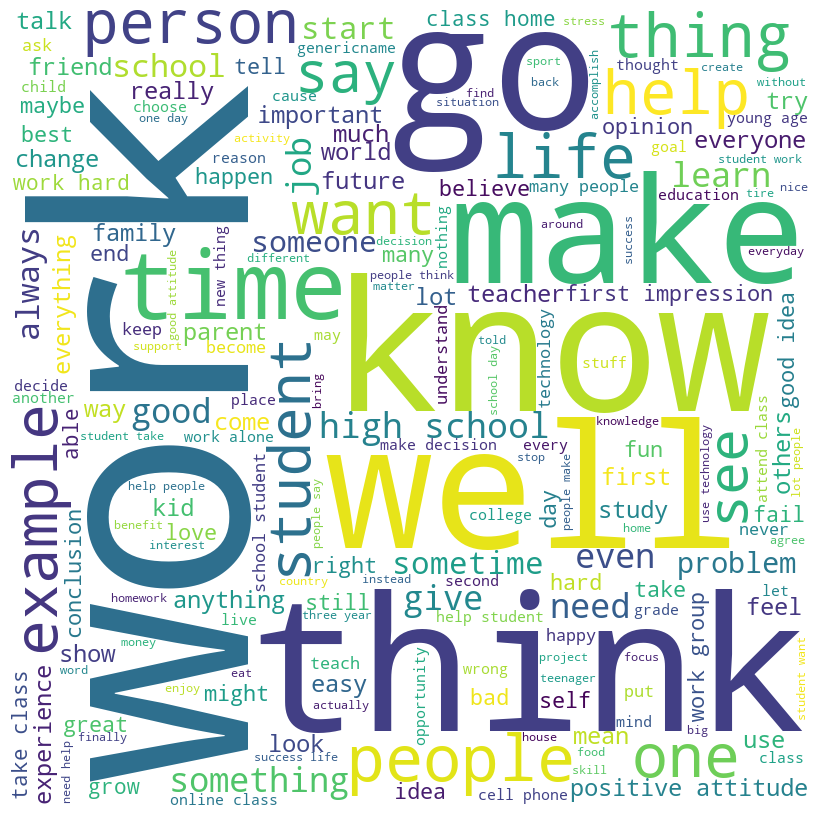

In [19]:
# Convert the list of tokenized words to a string for each row in the column
text = df_train['lemmatized_text'].apply(lambda x: ' '.join(x))

# Join the strings
words = ' '.join(text.tolist())

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)

sns.set_style('darkgrid')

# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


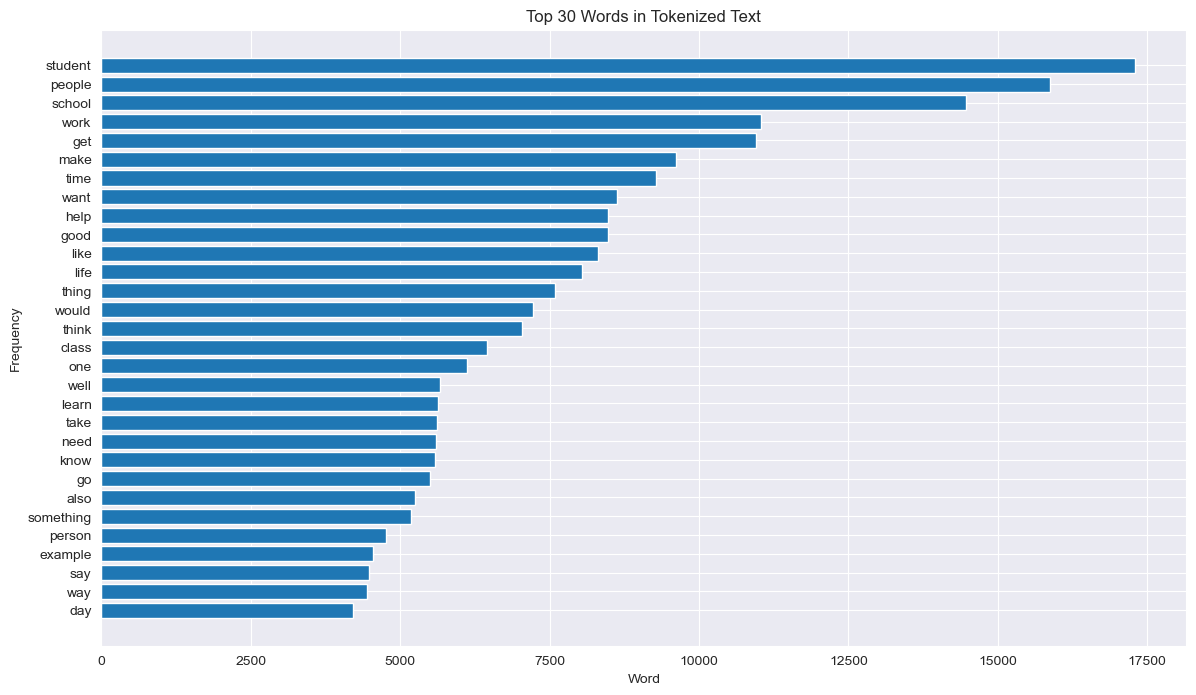

In [20]:
# Flatten the list of tokenized words
words = [word for sentence in df_train['lemmatized_text'] for word in sentence]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 30 most common words and their frequencies
word_list = word_freq.most_common(30)

# Sort the word list in descending order of frequency
word_list = sorted(word_list, key=lambda x: x[1], reverse=False)

# Set the figure size
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')

# Create a bar chart of the word frequencies
plt.barh([word[0] for word in word_list], [word[1] for word in word_list])

# Set the chart title and axis labels
plt.title('Top 30 Words in Tokenized Text')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Show the chart
plt.show()

Let's understand how the essays are distributed in terms of total length, sentences and words.

mean essay length: 2335
min essay length: 82
max essay length: 6044


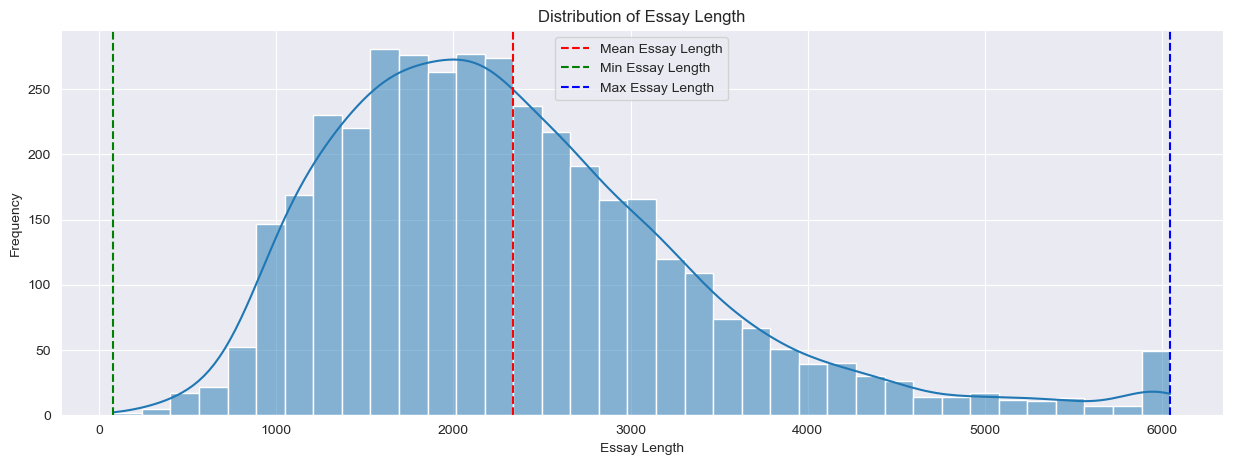

In [21]:
# Compute the length of each essay
essay_lengths = df_train['full_text'].apply(len)

# Compute the statistics
mean_length = essay_lengths.mean()
print('mean essay length:', round(mean_length))

min_length = essay_lengths.min()
print('min essay length:', round(min_length))

max_length = essay_lengths.max()
print('max essay length:', round(max_length))

# Set the figure size and style
plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')

# Plot the distribution of essay lengths
sns.histplot(data=essay_lengths, kde=True)

# Add a vertical line for the mean essay length
plt.axvline(x=mean_length, color='red', linestyle='--', label='Mean Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=min_length, color='green', linestyle='--', label='Min Essay Length')

# Add a vertical line for the minimum essay length
plt.axvline(x=max_length, color='blue', linestyle='--', label='Max Essay Length')

# Set the title and labels
plt.title("Distribution of Essay Length")
plt.xlabel("Essay Length")
plt.ylabel("Frequency")

# Add a legend
plt.legend()

# Show the plot
plt.show()


Average Number of Sentences in an Essay: 18
Min Number of Sentences in an Essay: 1
Max Number of Sentences in an Essay: 99


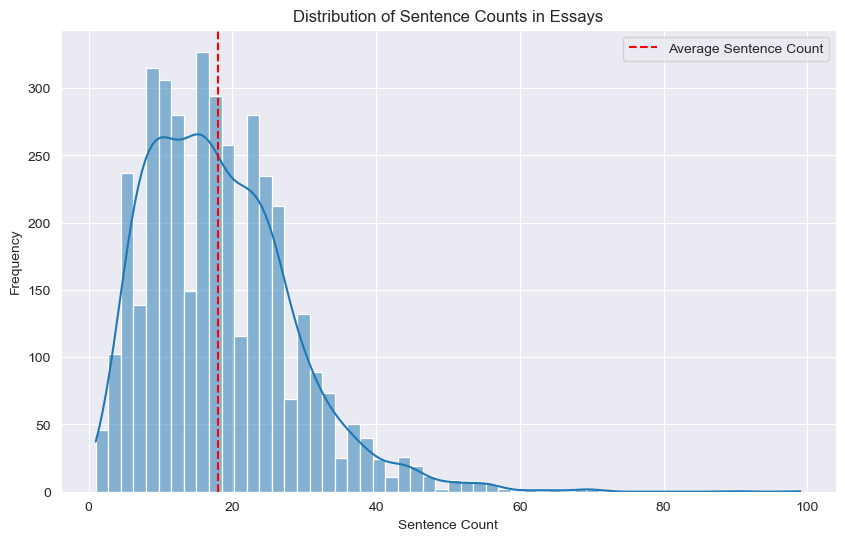

In [22]:
# Compute the statistics
df_train['sent_count'] = df_train['full_text'].apply(lambda x: len(sent_tokenize(x)))
avg_sent = round(df_train['sent_count'].mean())
print('Average Number of Sentences in an Essay: {}'.format(avg_sent))

min_sent = round(df_train['sent_count'].min())
print('Min Number of Sentences in an Essay: {}'.format(min_sent))

max_sent = round(df_train['sent_count'].max())
print('Max Number of Sentences in an Essay: {}'.format(max_sent))

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

# Plot the distribution of sentence counts
title = 'Distribution of Sentence Counts in Essays'
sns.histplot(df_train['sent_count'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Sentence Count')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Average Sentence Length: 30
Min Sentence Length: 6
Max Sentence Length: 578


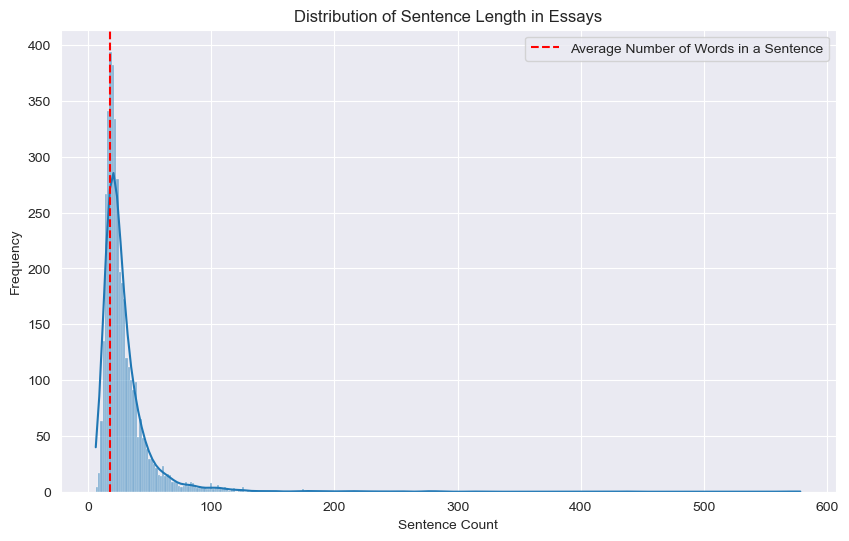

In [23]:
# Compute the average number of words in a sentence in an essay
df_train['sent_len'] = df_train['full_text'].apply(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))
avg_sent_len = round(np.mean(df_train['sent_len']))
print('Average Sentence Length: {}'.format(avg_sent_len))

min_sent_len = round(np.min(df_train['sent_len']))
print('Min Sentence Length: {}'.format(min_sent_len))

max_sent_len = round(np.max(df_train['sent_len']))
print('Max Sentence Length: {}'.format(max_sent_len))

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

# Plot the distribution of sentence length
title = 'Distribution of Sentence Length in Essays'
sns.histplot(df_train['sent_len'], kde=True)
plt.axvline(x=avg_sent, color='red', linestyle='--', label='Average Number of Words in a Sentence')
plt.legend()
plt.title(title)
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Mean word count in essay: 430
Min word count in essay: 14
Max word count in essay: 1260


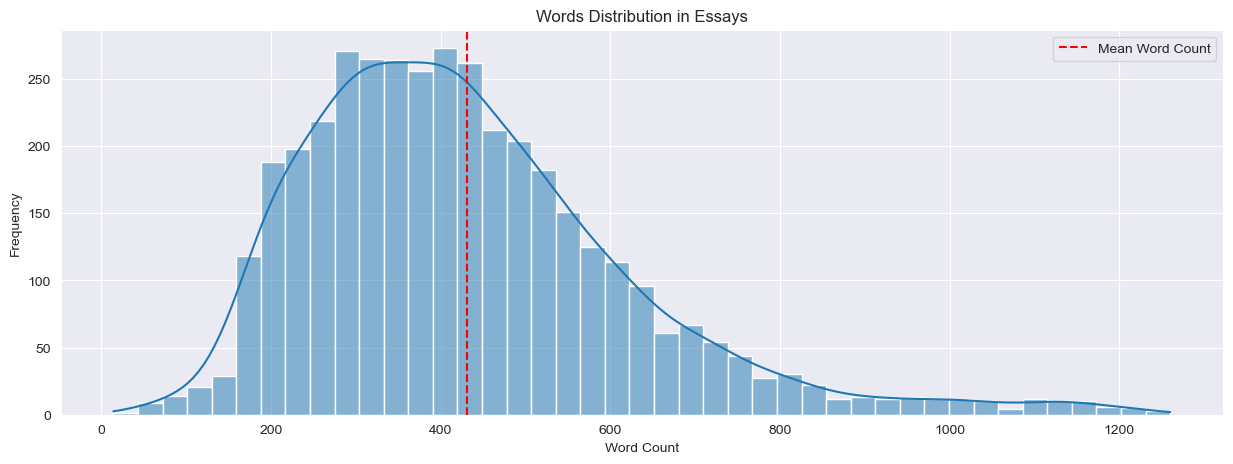

In [24]:
# Set the figure size and style
fig = plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')

# Compute the word count for each essay
df_train['word_count'] = df_train.full_text.apply(lambda x: len(x.split()))

# Plot the distribution of word count
sns.histplot(data=df_train, x="word_count", kde=True)

# Plot the mean of word count
mean_word_count = df_train['word_count'].mean()
print('Mean word count in essay:', round(mean_word_count))

min_word_count = df_train['word_count'].min()
print('Min word count in essay:', round(min_word_count))

max_word_count = df_train['word_count'].max()
print('Max word count in essay:', round(max_word_count))

plt.axvline(x=mean_word_count, color='red', linestyle='--', label='Mean Word Count')
plt.legend()

# Set the title and labels
plt.title("Words Distribution in Essays")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Show the plot
plt.show()


### C. ESSAY SCORE ANALYSIS

In [25]:
from spellchecker import SpellChecker
from nltk.corpus import wordnet as wn

# Create a spellchecker object for English
spell = SpellChecker(language='en')

# Define a function to count the number of spelling mistakes in a given essay
def count_spelling_mistakes(essay):
    mistakes = []
    for word in essay:
        if word not in spell and not wn.synsets(word, pos='n'):
            mistakes.append(word)
    return mistakes, len(mistakes)

# Apply the function to the tokenized text column and store the results in new columns
df_train[['mistakes', 'num_mistakes']] = df_train['cleaned_tokenize_text'].apply(lambda x: pd.Series(count_spelling_mistakes(x)))

In [26]:
# Below was just for cross - verifying
# df_train[['corrected_mistakes', 'correct_num_mistakes']] = df_train['corrected_text'].apply(lambda x: pd.Series(count_spelling_mistakes(x)))

In [27]:
df_train[df_train["text_id"] == "062AE7A344D3"]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text,lemmatized_text,sent_count,sent_len,word_count,mistakes,num_mistakes
86,062AE7A344D3,people who value self-reliance\n\nPeople who v...,2.0,2.5,3.0,3.0,2.0,2.5,"[people, value, selfreliance, people, valus, s...","[people, value, selfreliance, people, value, s...","[people, value, selfreliance, people, value, s...",31,22.741935,705,"[selfreliance, valus, selfreiance, defin, seen...",36


In [28]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,corrected_text,lemmatized_text,sent_count,sent_len,word_count,mistakes,num_mistakes
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho...","[think, students, would, benefit, learning, ho...","[think, student, would, benefit, learn, home, ...",18,14.500000,261,[],0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening...","[problem, change, let, best, matter, happening...","[problem, change, let, best, matter, happen, c...",14,38.071429,533,[],0
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principal, change, school, policy, grad...","[dear, principal, change, school, policy, grad...","[dear, principal, change, school, policy, grad...",19,16.842105,320,[],0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac...","[best, time, life, become, agree, greatest, ac...","[best, time, life, become, agree, great, accom...",36,20.222222,728,[],0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,...","[small, act, kindness, impact, people, change,...","[small, act, kindness, impact, people, change,...",3,78.000000,234,"[kindess, homeles, triying, greate, kindess, w...",11


In [ ]:
def count_pos_tags(tokens):
    noun_count = 0
    verb_count = 0
    adjective_count = 0
    adverb_count = 0
    
    # loop through each token and increment the corresponding counter
    for token, tag in pos_tag(tokens):
        if tag.startswith('N'):  # noun
            noun_count += 1
        elif tag.startswith('V'):  # verb
            verb_count += 1
        elif tag.startswith('J'):  # adjective
            adjective_count += 1
        elif tag.startswith('R'):  # adverb
            adverb_count += 1
    
    # return a dictionary with the counts
    return {'noun': noun_count, 'verb': verb_count, 'adjective': adjective_count, 'adverb': adverb_count}

# apply the count_pos_tags function to each row
df_train['pos_counts'] = df_train['lemmatized_text'].apply(count_pos_tags)

# extract the count for each POS tag into a separate column
df_train['noun_count'] = df_train['pos_counts'].apply(lambda x: x['noun'])
df_train['verb_count'] = df_train['pos_counts'].apply(lambda x: x['verb'])
df_train['adjective_count'] = df_train['pos_counts'].apply(lambda x: x['adjective'])
df_train['adverb_count'] = df_train['pos_counts'].apply(lambda x: x['adverb'])

# drop the tokens and pos_counts columns
df_train = df_train.drop(['pos_counts'], axis=1)

In [ ]:
# define a function to assign score category based on scores
def assign_score_category(row):
    if all(row[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']] <= 2.5):
        return 'low'
    elif all(row[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']] >= 4):
        return 'high'
    else:
        return 'medium'

# apply the function to create a new column
df_train['Score_Category'] = df_train.apply(assign_score_category, axis=1)

df_train.head()

#Score five out of six

In [ ]:
low_df = df_train[df_train['Score_Category'] == 'low'].reset_index()
med_df = df_train[df_train['Score_Category'] == 'medium'].reset_index()
high_df = df_train[df_train['Score_Category'] == 'high'].reset_index()

print('Low Scored Essays Shape: ', low_df.shape)
print('Medium Scored Essays Shape: ', med_df.shape)
print('High Scored Essays Shape: ', high_df.shape)

In [ ]:
low_df['full_text'][0]

In [ ]:
high_df['full_text'][0]

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the histograms of num_mistakes for low_df and high_df
sns.histplot(data=low_df, x='num_mistakes', color='red', alpha=0.5, stat='percent', label='Low Scored Essays', kde=True)
sns.histplot(data=high_df, x='num_mistakes', color='green', alpha=0.5, stat='percent', label='High Scored Essays', kde=True)

# Set the chart title and axis labels
plt.title('Percentage of Mistakes in Low and High Scored Essays')
plt.xlabel('Number of Mistakes')
plt.ylabel('Frequency')

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()

print(low_df['num_mistakes'].min())
print(low_df['num_mistakes'].max())
print(high_df['num_mistakes'].min())
print(high_df['num_mistakes'].max())

In [ ]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='sent_count', y='sent_len', hue='Score_Category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='sent_count', y='sent_len', hue='Score_Category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 80)
plt.ylim(0, 450)

# Calculate and plot the average word_count for low and high scored essays
low_sent_count_mean = round(low_df['sent_count'].mean())
high_sent_count_mean = round(high_df['sent_count'].mean())
print('low_word_count_mean', low_sent_count_mean)
print('high_word_count_mean',high_sent_count_mean)

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())
print('low_sent_len_mean', low_sent_len_mean)
print('high_sent_len_mean',high_sent_len_mean)

# Add plot titles and labels
plt.title('Sent_count vs Sent_len by Score_Category')
plt.xlabel('Sent_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

In [ ]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='word_count', y='sent_len', hue='Score_Category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='word_count', y='sent_len', hue='Score_Category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 1000)
plt.ylim(0, 100)

# Calculate and plot the average word_count for low and high scored essays
low_word_count_mean = round(low_df['word_count'].mean())
high_word_count_mean = round(high_df['word_count'].mean())

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())

# Add plot titles and labels
plt.title('Sent_len vs Word_count by Score_Category')
plt.xlabel('Word_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

#Try histogram

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(x='noun_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 0])
sns.histplot(x='noun_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 0])

sns.histplot(x='verb_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 1])
sns.histplot(x='verb_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 1])

sns.histplot(x='adverb_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 0])
sns.histplot(x='adverb_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 0])

sns.histplot(x='adjective_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 1])
sns.histplot(x='adjective_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 1])

plt.suptitle('Distribution of POS Tags in Low and High Scored Essays')
plt.tight_layout()

plt.show()


In [ ]:
# create a dataframe with aggregated counts for each POS tag and score level
pos_counts = pd.concat([low_df.mean(), high_df.mean()], axis=1)
pos_counts.columns = ['low', 'high']
pos_counts = pos_counts[['low', 'high']].T[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']]

# plot the stacked bar chart
pos_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Score Level')
plt.ylabel('Count')
plt.title('Count of POS Tags in Low and High Scored Essays')
plt.legend(['Noun', 'Verb', 'Adverb', 'Adjective'])
plt.show()


In [ ]:
# Calculate the correlation matrix for the four columns in low_df
low_corr = low_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(low_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag Counts in Low Scored Essays')

# Display the chart
plt.show()

# Calculate the correlation matrix for the four columns in high_df
high_corr = high_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(high_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag Counts in High Scored Essays')

# Display the chart
plt.show()

In [ ]:
df_train.to_csv('processed_essays.csv', sep=',', index=False)